# **RNA-Seq Using SVM and Logistic Regression**
 ## Kieran Bissessar (kb2784)

RNA-seq is a method of detecting gene transcript abundance. For a given sample, the number of sequencing reads matching a specific gene is reported. In this dataset, the normalized RNA-seq counts have been provided for over 20,000 genes from different mutant samples. Our goal is to be able to determine the mutation given a set of values for the different genes ( 20,000+ ).

## 1 Read in RNA-Seq Dataset

In [5]:
import pandas as pd;

data = pd.read_csv("data.csv");
print("Data head :");
print(data.head());

labels = pd.read_csv("labels.csv");
print("\n\nLabels head :");
print(labels.head());

Data head :
  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813  

## 2 Merge data.csv and labels.csv into a single data frame

In [6]:
df = pd.merge(labels,
              data,
              how = 'inner');

print(df.head());

  Unnamed: 0 Class  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0  PRAD     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1  LUAD     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2  PRAD     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3  PRAD     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4  BRCA     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  7.175175  0.591871  ...    4.926711    8.210257    9.723516    7.220030   
1  6.816049  0.000000  ...    4.593372    7.323865    9.740931    6.256586   
2  6.972130  0.452595  ...    5.125213    8.127123   10.908640    5.401607   
3  7.843375  0.434882  ...    6.076566    8.792959   10.141520    8.942805   
4  6.566967  0.360982  ...    5.996032    8.891425   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_

## 3 Randomly divide the data into Train and test set in the ratio 80:20

In [8]:
from sklearn.model_selection import train_test_split;
#X_train, X_test, y_train, y_test = train_test_split(data, 
#                                                    labels, 
#                                                    test_size=0.2, 
#                                                    random_state=0);

data_train , data_test = train_test_split(df, test_size = 0.2, random_state = 0);
print(data_train)
print(data_test)

     Unnamed: 0 Class    gene_0    gene_1    gene_2    gene_3     gene_4  \
364  sample_364  KIRC  0.000000  0.000000  2.275752  6.025051  10.181674   
458  sample_458  KIRC  0.757450  1.915330  1.182565  6.282078   8.972058   
76    sample_76  BRCA  0.000000  3.195537  2.275156  5.719778   9.145591   
64    sample_64  PRAD  0.000000  2.949311  4.597877  7.095460   9.762425   
638  sample_638  BRCA  0.000000  3.777693  3.417920  7.031164   9.960924   
..          ...   ...       ...       ...       ...       ...        ...   
763  sample_763  LUAD  0.000000  4.235061  4.218874  6.542637   8.981995   
192  sample_192  LUAD  0.531868  3.755486  1.868963  6.726123  10.859449   
629  sample_629  BRCA  0.000000  2.615675  1.855511  7.722616   9.798412   
559  sample_559  KIRC  0.000000  2.736930  3.005256  6.358199   8.978988   
684  sample_684  PRAD  0.000000  2.387197  4.344992  7.031561   9.868644   

     gene_5    gene_6    gene_7  ...  gene_20521  gene_20522  gene_20523  \
364     0.0

## 4 Distribution Inspection

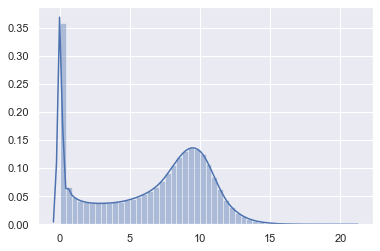

In [4]:
# pip install seaborn
import seaborn as sns;
sns.set(color_codes = True);

sns.distplot(data_train.iloc[:,2:]);

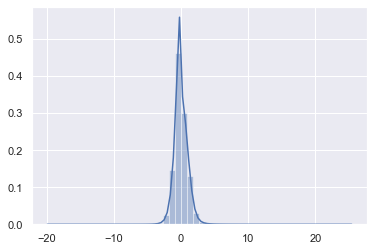

In [5]:
from sklearn.preprocessing import StandardScaler;
sc = StandardScaler()
sc.fit(data_train.iloc[:,2:])
data_train_std = sc.transform(data_train.iloc[:,2:])
data_test_std = sc.transform(data_test.iloc[:,2:])

sns.distplot(data_train_std);


## 5 SVM Classifier for all combinations of 2 classes

### Combinations

In [6]:
import numpy as np;
print('Class labels:', np.unique(labels.iloc[:,1:]))
class_lst = np.unique(labels.iloc[:,1:]);

print("\nCOMBINATIONS :",);
print("\t 1. ", class_lst[0]," ",class_lst[1]);
print("\t 2. ", class_lst[0]," ",class_lst[2]);
print("\t 3. ", class_lst[0]," ",class_lst[3]);
print("\t 4. ", class_lst[0]," ",class_lst[4]);
print("\t 5. ", class_lst[1]," ",class_lst[2]);
print("\t 6. ", class_lst[1]," ",class_lst[3]);
print("\t 7. ", class_lst[1]," ",class_lst[4]);
print("\t 8. ", class_lst[2]," ",class_lst[3]);
print("\t 9. ", class_lst[2]," ",class_lst[4]);
print("\t10. ", class_lst[3]," ",class_lst[4]);
                      

Class labels: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']

COMBINATIONS :
	 1.  BRCA   COAD
	 2.  BRCA   KIRC
	 3.  BRCA   LUAD
	 4.  BRCA   PRAD
	 5.  COAD   KIRC
	 6.  COAD   LUAD
	 7.  COAD   PRAD
	 8.  KIRC   LUAD
	 9.  KIRC   PRAD
	10.  LUAD   PRAD


In [7]:
brca_bool = (data_train['Class'] == 'BRCA');
coad_bool = (data_train['Class'] == 'COAD');
kirc_bool = (data_train['Class'] == 'KIRC');
luad_bool = (data_train['Class'] == 'LUAD');
prad_bool = (data_train['Class'] == 'PRAD');

data_train_BRCA = data_train_std[brca_bool];
data_train_COAD = data_train_std[coad_bool];
data_train_KIRC = data_train_std[kirc_bool];
data_train_LUAD = data_train_std[luad_bool];
data_train_PRAD = data_train_std[prad_bool];

y_train_BRCA = data_train.iloc[:,1][brca_bool];
y_train_COAD = data_train.iloc[:,1][coad_bool];
y_train_KIRC = data_train.iloc[:,1][kirc_bool];
y_train_LUAD = data_train.iloc[:,1][luad_bool];
y_train_PRAD = data_train.iloc[:,1][prad_bool];


data_train01 = np.vstack((data_train_BRCA , data_train_COAD))
data_train02 = np.vstack((data_train_BRCA , data_train_KIRC))
data_train03 = np.vstack((data_train_BRCA , data_train_LUAD))
data_train04 = np.vstack((data_train_BRCA , data_train_PRAD))
data_train12 = np.vstack((data_train_COAD , data_train_KIRC))
data_train13 = np.vstack((data_train_COAD , data_train_LUAD))
data_train14 = np.vstack((data_train_COAD , data_train_PRAD))
data_train23 = np.vstack((data_train_KIRC , data_train_LUAD))
data_train24 = np.vstack((data_train_KIRC , data_train_PRAD))
data_train34 = np.vstack((data_train_LUAD , data_train_PRAD))

y_train01 = pd.concat([y_train_BRCA , y_train_COAD])
y_train02 = pd.concat([y_train_BRCA , y_train_KIRC])
y_train03 = pd.concat([y_train_BRCA , y_train_LUAD])
y_train04 = pd.concat([y_train_BRCA , y_train_PRAD])
y_train12 = pd.concat([y_train_COAD , y_train_KIRC])
y_train13 = pd.concat([y_train_COAD , y_train_LUAD])
y_train14 = pd.concat([y_train_COAD , y_train_PRAD])
y_train23 = pd.concat([y_train_KIRC , y_train_LUAD])
y_train24 = pd.concat([y_train_KIRC , y_train_PRAD])
y_train34 = pd.concat([y_train_LUAD , y_train_PRAD])

In [8]:
brca_bool_test = (data_test['Class'] == 'BRCA');
coad_bool_test = (data_test['Class'] == 'COAD');
kirc_bool_test = (data_test['Class'] == 'KIRC');
luad_bool_test = (data_test['Class'] == 'LUAD');
prad_bool_test = (data_test['Class'] == 'PRAD');

data_test_BRCA = data_test_std[brca_bool_test];
data_test_COAD = data_test_std[coad_bool_test];
data_test_KIRC = data_test_std[kirc_bool_test];
data_test_LUAD = data_test_std[luad_bool_test];
data_test_PRAD = data_test_std[prad_bool_test];

y_test_BRCA = data_test.iloc[:,1][brca_bool_test];
y_test_COAD = data_test.iloc[:,1][coad_bool_test];
y_test_KIRC = data_test.iloc[:,1][kirc_bool_test];
y_test_LUAD = data_test.iloc[:,1][luad_bool_test];
y_test_PRAD = data_test.iloc[:,1][prad_bool_test];

data_test01 = np.vstack((data_test_BRCA , data_test_COAD))
data_test02 = np.vstack((data_test_BRCA , data_test_KIRC))
data_test03 = np.vstack((data_test_BRCA , data_test_LUAD))
data_test04 = np.vstack((data_test_BRCA , data_test_PRAD))
data_test12 = np.vstack((data_test_COAD , data_test_KIRC))
data_test13 = np.vstack((data_test_COAD , data_test_LUAD))
data_test14 = np.vstack((data_test_COAD , data_test_PRAD))
data_test23 = np.vstack((data_test_KIRC , data_test_LUAD))
data_test24 = np.vstack((data_test_KIRC , data_test_PRAD))
data_test34 = np.vstack((data_test_LUAD , data_test_PRAD))

y_test01 = pd.concat([y_test_BRCA , y_test_COAD])
y_test02 = pd.concat([y_test_BRCA , y_test_KIRC])
y_test03 = pd.concat([y_test_BRCA , y_test_LUAD])
y_test04 = pd.concat([y_test_BRCA , y_test_PRAD])
y_test12 = pd.concat([y_test_COAD , y_test_KIRC])
y_test13 = pd.concat([y_test_COAD , y_test_LUAD])
y_test14 = pd.concat([y_test_COAD , y_test_PRAD])
y_test23 = pd.concat([y_test_KIRC , y_test_LUAD])
y_test24 = pd.concat([y_test_KIRC , y_test_PRAD])
y_test34 = pd.concat([y_test_LUAD , y_test_PRAD])


In [9]:
from sklearn.svm import SVC;

svm01 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm01.fit(data_train01, y_train01);

svm02 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm02.fit(data_train02, y_train02);

svm03 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm03.fit(data_train03 , y_train03);

svm04 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm04.fit(data_train04, y_train04);

svm12 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm12.fit(data_train12, y_train12);

svm13 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm13.fit(data_train13, y_train13);

svm14 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm14.fit(data_train14, y_train14);

svm23 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm23.fit(data_train23, y_train23);

svm24 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm24.fit(data_train24, y_train24);

svm34 = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm34.fit(data_train34, y_train34);

## 6 Weight Matrix

In [10]:
#import matplotlib.pyplot as plt
Xw = np.array(data_train_std);
print(Xw);
#%matplotlib inline
svm_w = SVC(kernel = "linear", C=1e10, random_state = 0);
svm_w.fit(Xw, data_train.iloc[:,1]);
W=svm_w.coef_;
#W=W.flatten();
print("Weight Matrix :");
print(W)
#plt.stem(W, use_line_collection = False);

[[-0.20680191 -2.53389798 -0.79848496 ... -0.95178507  1.05385861
  -0.24865145]
 [ 4.86041305 -0.92157257 -1.84423579 ... -0.0571117   0.46829036
  -0.24865145]
 [-0.20680191  0.1561062  -0.79905507 ...  0.22082625 -0.04312397
  -0.24865145]
 ...
 [-0.20680191 -0.33202135 -1.20049037 ...  1.2215407  -1.18458949
   4.47158555]
 [-0.20680191 -0.22994944 -0.10063572 ... -0.32086032 -0.14918577
  -0.24865145]
 [-0.20680191 -0.52435437  1.18096544 ... -0.49128611  0.15688328
  -0.24865145]]
Weight Matrix :
[[ 1.44299134e-05 -5.51741390e-05 -1.84568842e-05 ...  1.72470756e-04
   2.87649548e-04 -3.39748575e-05]
 [-5.59770747e-05  2.10751563e-04  1.27160972e-04 ...  7.29020950e-05
   2.67553136e-04 -5.50317810e-05]
 [-1.27341542e-04 -3.86050467e-05 -1.84153614e-04 ...  1.03047394e-04
   5.68588850e-04 -1.36766825e-04]
 ...
 [ 3.38803038e-05 -3.33920081e-04 -2.46955602e-04 ...  1.06879172e-05
  -2.54068406e-05  6.07309905e-05]
 [-4.11079229e-05 -1.48046111e-04 -2.86747460e-04 ... -3.46494229e-

## 7 Accuracy on train and test set

In [11]:
from sklearn.metrics import accuracy_score;
y_pred_test01 = svm01.predict(data_test01)
print(accuracy_score(y_test01, y_pred_test01))
y_pred_train01 = svm01.predict(data_train01)
print(accuracy_score(y_train01, y_pred_train01))
print();

y_pred_test02 = svm02.predict(data_test02)
print(accuracy_score(y_test02, y_pred_test02))
y_pred_train02 = svm02.predict(data_train02)
print(accuracy_score(y_train02, y_pred_train02))
print();

y_pred_test03 = svm03.predict(data_test03)
print(accuracy_score(y_test03, y_pred_test03))
y_pred_train03 = svm03.predict(data_train03)
print(accuracy_score(y_train03, y_pred_train03))
print();

y_pred_test04 = svm04.predict(data_test04)
print(accuracy_score(y_test04, y_pred_test04))
y_pred_train04 = svm04.predict(data_train04)
print(accuracy_score(y_train04, y_pred_train04))
print();

y_pred_test12 = svm12.predict(data_test12)
print(accuracy_score(y_test12, y_pred_test12))
y_pred_train12 = svm12.predict(data_train12)
print(accuracy_score(y_train12, y_pred_train12))
print();

y_pred_test13 = svm13.predict(data_test13)
print(accuracy_score(y_test13, y_pred_test13))
y_pred_train13 = svm13.predict(data_train13)
print(accuracy_score(y_train13, y_pred_train13))
print();

y_pred_test14 = svm14.predict(data_test14)
print(accuracy_score(y_test14, y_pred_test14))
y_pred_train14 = svm14.predict(data_train14)
print(accuracy_score(y_train14, y_pred_train14))
print();

y_pred_test23 = svm23.predict(data_test23)
print(accuracy_score(y_test23, y_pred_test23))
y_pred_train23 = svm23.predict(data_train23)
print(accuracy_score(y_train23, y_pred_train23))
print();

y_pred_test24 = svm24.predict(data_test24)
print(accuracy_score(y_test24, y_pred_test24))
y_pred_train24 = svm24.predict(data_train24)
print(accuracy_score(y_train24, y_pred_train24))
print();

y_pred_test34 = svm34.predict(data_test34)
print(accuracy_score(y_test34, y_pred_test34))
y_pred_train34 = svm34.predict(data_train34)
print(accuracy_score(y_train34, y_pred_train34))
print();

1.0
1.0

1.0
1.0

1.0
1.0

0.9891304347826086
1.0

1.0
1.0

1.0
1.0

1.0
1.0

1.0
1.0

1.0
1.0

1.0
1.0



Most of the accuraccies seem to be one except for the test for scenario 04 (BRCA PRAD). This happens whether I change the kernel or the C. The train accuracy is the accuracy of a model on examples it was constructed on. The test accuracy is the accuracy of a model on examples it hasn't seen. The test and train accuracies are the same here. It was read that in confusion matrices that a large difference in accuracies in the train and test data would suggest overfitting.

## 8 SVM classifier to predict all the classes

In [12]:
svm = SVC(kernel = "rbf", C = 1.0, random_state = 0);
svm.fit(data_train_std, data_train.iloc[:,1]);
print(data_train.iloc[:,1])

y_pred_test = svm.predict(data_test_std,)
print(accuracy_score(data_test.iloc[:,1], y_pred_test))
y_pred_train = svm.predict(data_train_std,)
print(accuracy_score(data_train.iloc[:,1], y_pred_train))

364    KIRC
458    KIRC
76     BRCA
64     PRAD
638    BRCA
       ... 
763    LUAD
192    LUAD
629    BRCA
559    KIRC
684    PRAD
Name: Class, Length: 640, dtype: object
0.9937888198757764
1.0


## 9 Tuning SVM model with various parameters (kernel, regularization (c) , GAMMA, and margin)

In [13]:
## CHANGING C
svm_m = SVC(kernel = "rbf", C = 1000, random_state = 0);
svm_m.fit(data_train_std, data_train.iloc[:,1]);

y_pred_test = svm_m.predict(data_test_std,)
print(accuracy_score(data_test.iloc[:,1], y_pred_test))
y_pred_train = svm_m.predict(data_train_std,)
print(accuracy_score(data_train.iloc[:,1], y_pred_train))

## CHANGING KERNEL
svm_m = SVC(kernel = 'sigmoid', C = 1.0, random_state = 0); # linear also gives 1
svm_m.fit(data_train_std, data_train.iloc[:,1]);

y_pred_test = svm_m.predict(data_test_std,)
print(accuracy_score(data_test.iloc[:,1], y_pred_test))
y_pred_train = svm_m.predict(data_train_std,)
print(accuracy_score(data_train.iloc[:,1], y_pred_train))

## CHANGING GAMMA
svm_m = SVC(kernel = "rbf", C = 1.0, random_state = 0, gamma = 'auto');
svm_m.fit(data_train_std, data_train.iloc[:,1]);

y_pred_test = svm_m.predict(data_test_std,)
print(accuracy_score(data_test.iloc[:,1], y_pred_test))
y_pred_train = svm_m.predict(data_train_std,)
print(accuracy_score(data_train.iloc[:,1], y_pred_train))

0.9937888198757764
1.0
1.0
1.0
0.9937888198757764
1.0


The accuracies still seem high. If anything, a very high c value and implementing gamma seem to slightly lower the accuracy of the test subset.

## 10 Logistic regression model (L1 regularization) comparison

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', solver = "liblinear", C = 1.0, random_state = 0);
lr.fit(data_train_std, data_train.iloc[:,1]);

y_hat = lr.predict(data_train_std);
accuracy = np.mean(y_hat == data_train.iloc[:,1])
print(accuracy)

1.0


Linear logistic regression and SVMs usually get similar results.

LR tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs.

SVMs cares more about the points that are closest to the decision boundary (support vectors). 

LR is advantagous in that it is a simpler model - making it easier to implement. LR models can also be easily updated making it better to work with streaming data.

It was also learned that SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.
For this reason, LR might perform better than SVM in this case.

## 11 Weight comparison of SVM model and L1 regularized logistic regression

In [15]:
print("svm weight matrix :")
print(W);
#import matplotlib.pyplot as plt
Xw = np.array(data_train_std);
print("\n", Xw, "\n");
#%matplotlib inline
logreg_w = LogisticRegression(C=1e10);
logreg_w.fit(Xw, data_train.iloc[:,1]);
W2=logreg_w.coef_;
#W2=W2.flatten();
print("LR weight matrix :")
print(W2)
#plt.stem(W, use_line_collection = False);

svm weight matrix :
[[ 1.44299134e-05 -5.51741390e-05 -1.84568842e-05 ...  1.72470756e-04
   2.87649548e-04 -3.39748575e-05]
 [-5.59770747e-05  2.10751563e-04  1.27160972e-04 ...  7.29020950e-05
   2.67553136e-04 -5.50317810e-05]
 [-1.27341542e-04 -3.86050467e-05 -1.84153614e-04 ...  1.03047394e-04
   5.68588850e-04 -1.36766825e-04]
 ...
 [ 3.38803038e-05 -3.33920081e-04 -2.46955602e-04 ...  1.06879172e-05
  -2.54068406e-05  6.07309905e-05]
 [-4.11079229e-05 -1.48046111e-04 -2.86747460e-04 ... -3.46494229e-05
   1.94180247e-05  1.31348788e-04]
 [ 5.67350412e-05  1.09058244e-04 -6.29209310e-05 ... -1.57114751e-04
  -1.23693153e-04  1.41735962e-04]]

 [[-0.20680191 -2.53389798 -0.79848496 ... -0.95178507  1.05385861
  -0.24865145]
 [ 4.86041305 -0.92157257 -1.84423579 ... -0.0571117   0.46829036
  -0.24865145]
 [-0.20680191  0.1561062  -0.79905507 ...  0.22082625 -0.04312397
  -0.24865145]
 ...
 [-0.20680191 -0.33202135 -1.20049037 ...  1.2215407  -1.18458949
   4.47158555]
 [-0.20680191

Comparing the weights of the svm and the LR for all of the classes, it can be seen that the weights for the LR model is higher (abs value). This suggests that the labels contribute more
heavily in the LR model than the svm.